# Predicting heart disease using machine learning

## Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. `age` - age in years
2. `sex` - (1 = male; 0 = female)
3. `cp` - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. `trestbps` - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. `chol` - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. `fbs` - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. `restecg` - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. `thalach` - maximum heart rate achieved
9. `exang` - exercise induced angina (1 = yes; 0 = no)
10. `oldpeak` - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. `slope` - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. `ca` - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. `thal` - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. `target` - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

from sklearn.metrics import accuracy_score, classification_report

## Loading the data

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1. Exploratory Data Analysis (EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you're working with. 

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [4]:
df.size

4242

In [5]:
print('Shape:', df.shape)

Shape: (303, 14)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

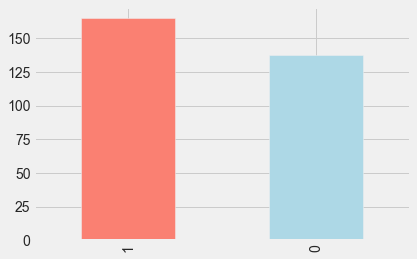

In [8]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

We have `165` person with heart disease and `138` person without heart disease, so our problem is balanced.

In [9]:
print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  1


In [10]:
df.drop_duplicates(inplace=True)
print("Number of duplicate rows: ", sum(df.duplicated()))

Number of duplicate rows:  0


In [11]:
# Checking for messing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Looks like the perfect dataset!!! No null values :-)

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.sort_values(by='age', ascending=1, inplace=True)
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


### Age vs. Max Heart Rate for Heart Disease

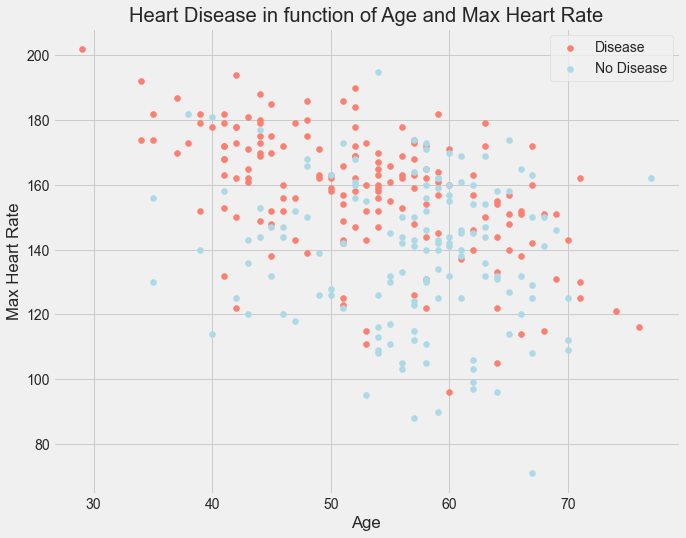

In [14]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

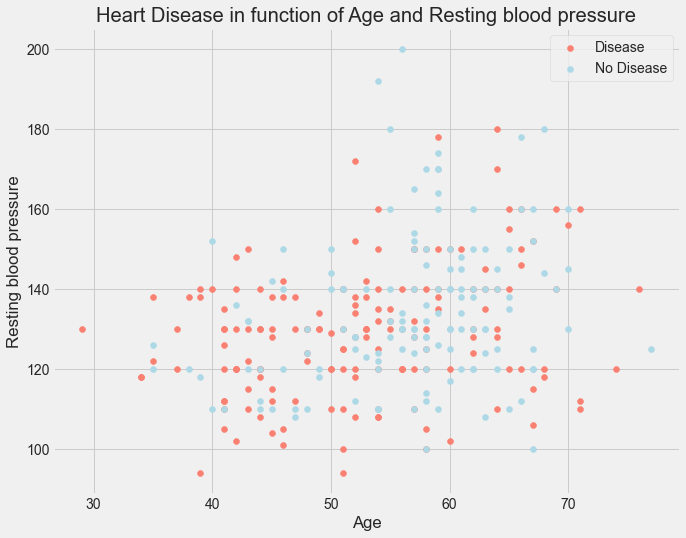

In [15]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.trestbps[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.trestbps[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Resting blood pressure")
plt.xlabel("Age")
plt.ylabel("Resting blood pressure")
plt.legend(["Disease", "No Disease"]);

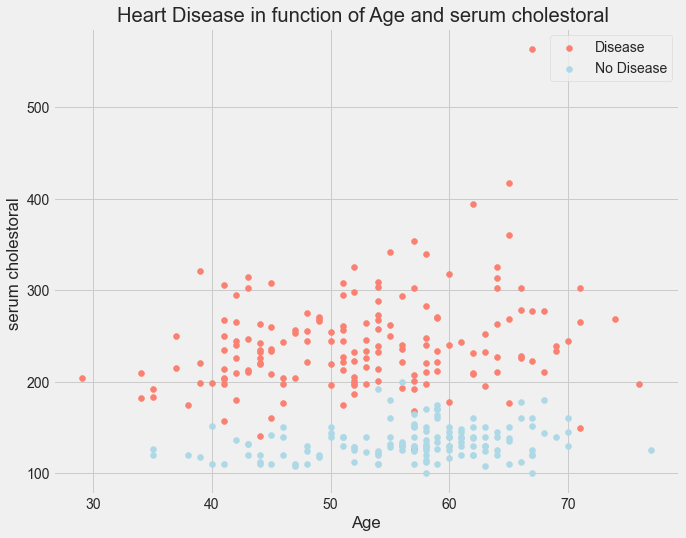

In [16]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.age[df.target==1],
            df.chol[df.target==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.trestbps[df.target==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and serum cholestoral ")
plt.xlabel("Age")
plt.ylabel("serum cholestoral ")
plt.legend(["Disease", "No Disease"]);

# 2. Correlation Matrix

<Axes: >

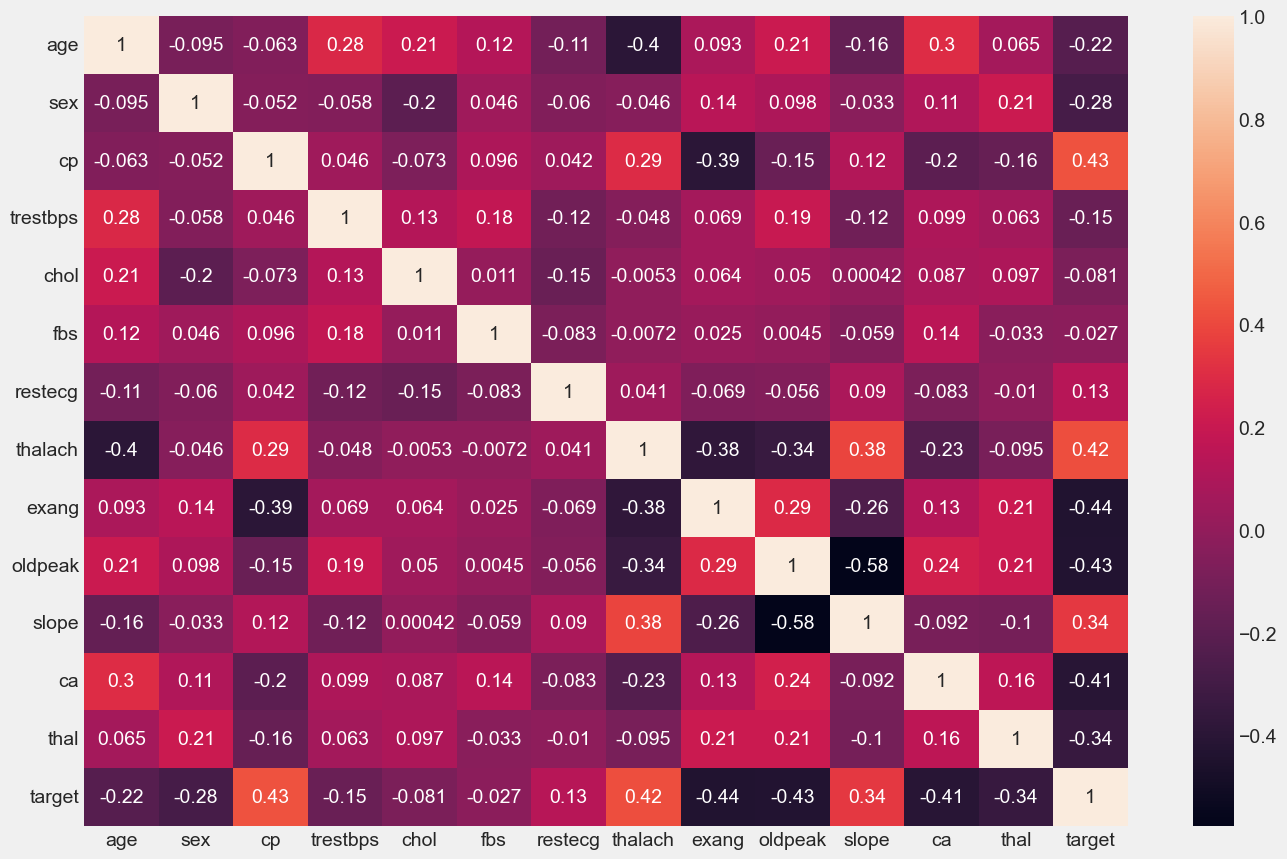

In [16]:
# Let's make our correlation matrix (pearson correlation)
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson', min_periods=1),annot=True)

## correlation with target

<Axes: title={'center': 'Correlation with target'}>

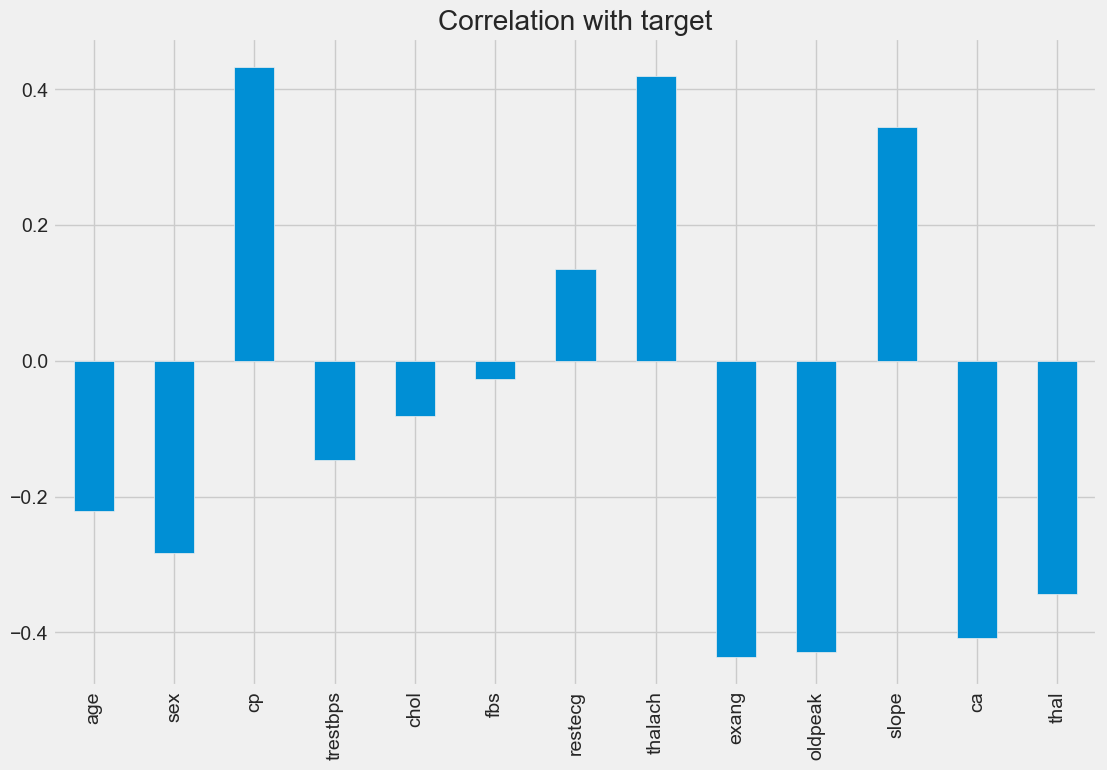

In [17]:
X = df.drop('target', axis=1)
y = df['target']
X.corrwith(y).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

- `fbs` and `chol` are the lowest correlated with the target variable.
- All other variables have a significant correlation with the target variable.

# 3. Scaling and PCA

By scaling we are removing potential bias that the model can have towards features with higher magnitudes.

PCA is used to reduce dimensionality of data.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
X_standard

array([[-2.81419172,  0.68265615,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       [-2.26066437,  0.68265615,  1.97647049, ...,  0.97951442,
        -0.71491124, -0.51399432],
       [-2.26066437, -1.46486632,  0.0353515 , ...,  0.97951442,
        -0.71491124, -0.51399432],
       ...,
       [ 2.16755447, -1.46486632,  0.0353515 , ...,  0.97951442,
         0.28003436, -0.51399432],
       [ 2.38896541, -1.46486632,  1.005911  , ..., -0.64583368,
        -0.71491124, -0.51399432],
       [ 2.49967088,  0.68265615, -0.93520799, ...,  0.97951442,
         2.26992556, -0.51399432]])

In [19]:
pca_model = PCA(n_components = 4)
pca_data_standard = pca_model.fit_transform(X_standard)
pca_data_standard

array([[-3.11023689, -1.14439477, -0.9064282 , -0.90391288],
       [-3.13328666, -0.8907571 , -1.49166123, -0.07293991],
       [-3.05720825, -0.86444124,  0.57513341,  0.57352412],
       ...,
       [ 0.88072288,  1.13826643,  2.0532213 , -0.33641145],
       [ 0.23286226,  0.98537701,  0.63429478,  2.9798736 ],
       [ 1.34590474,  0.9326598 ,  1.16498899, -2.56975086]])

In [20]:
dataset = pd.DataFrame(data = pca_data_standard, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
dataset['target'] = y
dataset.tail()

,PC1,PC2,PC3,PC4,target
297,0.443265,-0.431288,0.978819,2.283646,0.0
298,-0.393187,2.518031,0.075600,-0.381077,0.0
299,0.880723,1.138266,2.053221,-0.336411,0.0
300,0.232862,0.985377,0.634295,2.979874,0.0
301,1.345905,0.932660,1.164989,-2.569751,0.0


# 4. Applying machine learning algorithms

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['target'], axis=1),
    df.target,
    test_size= 0.2,
    random_state=0,
    stratify=df.target
)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 13)
(61, 13)
(241,)
(61,)


Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 2 different machine learning models:
1. Decision Tree Classifier
2. logistic regression


In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score

y_pred=lr.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy : ',round(accuracy,2)*100,'%')

Accuracy :  82.0 %


In [25]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
pred = tree_clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(y_test, pred) * 100)
print("Classification Report: \n", classification_report(y_test, pred))

Accuracy Score:  77.04918032786885
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

